In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d adhok93/bird-spectrogram

Dataset URL: https://www.kaggle.com/datasets/adhok93/bird-spectrogram
License(s): Apache 2.0
100% 3.82G/3.83G [00:53<00:00, 102MB/s]
100% 3.83G/3.83G [00:53<00:00, 76.6MB/s]


In [ ]:
import zipfile
zip=zipfile.ZipFile("/content/bird-spectrogram.zip","r")
zip.extractall('/content')
zip.close()

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.axis('off')  # No axes for a clean image
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def convert_audio_to_spectrograms(base_dir, output_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.wav'):
                audio_path = os.path.join(root, file)

                # Determine the species name from the directory structure
                species_name = os.path.basename(os.path.dirname(audio_path))

                # Create output directory for the species if not exists
                species_output_dir = os.path.join(output_dir, species_name)
                os.makedirs(species_output_dir, exist_ok=True)

                # Create output filename with .png extension
                output_filename = os.path.splitext(file)[0] + '.png'
                output_path = os.path.join(species_output_dir, output_filename)

                # Save the spectrogram
                save_spectrogram(audio_path, output_path)

# Define paths
train_audio_dir = '/content/drive/MyDrive/Bird Species Audio/Train'
train_spectrogram_dir = '/content/Bird Species Audio Mel-Spectrogram/Train'
test_audio_dir = '/content/drive/MyDrive/Bird Species Audio/Test'
test_spectrogram_dir = '/content/Bird Species Audio Mel-Spectrogram/Test'

# Convert audio files to spectrograms
convert_audio_to_spectrograms(train_audio_dir, train_spectrogram_dir)
convert_audio_to_spectrograms(test_audio_dir, test_spectrogram_dir)


In [ ]:
import zipfile
import os

def zip_folder(folder_path, output_zip):
    """
    Compresses the contents of a folder into a ZIP file.

    Parameters:
    - folder_path (str): Path to the folder to be zipped.
    - output_zip (str): Path to the output ZIP file.
    """
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through all the files in the folder
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create the full file path
                file_path = os.path.join(root, file)
                # Add file to the zip
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Example usage:
folder_to_zip = '/content/Bird Species Audio Mel-Spectrogram'
output_zip_file = '/content/Bird Species Audio Mel_Spectrogram.zip'

zip_folder(folder_to_zip, output_zip_file)


In [ ]:
import IPython.display as ipd
import librosa.display
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.15.0


In [ ]:
SOUND_DIR = '/content/drive/MyDrive/Bird Species Audio/Train/Asian Brown Flycatcher (Muscicapa dauurica)/whatsapp-audio-2024-06-15-at-33259-pm-1_rigWEcSG.wav'
# listen to the recording
ipd.display(ipd.Audio(SOUND_DIR))

# load the mp3 file
signal, sr = librosa.load(SOUND_DIR, duration=10)  # sr = sampling rate

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title("Monophonic Waveform")
plt.show()

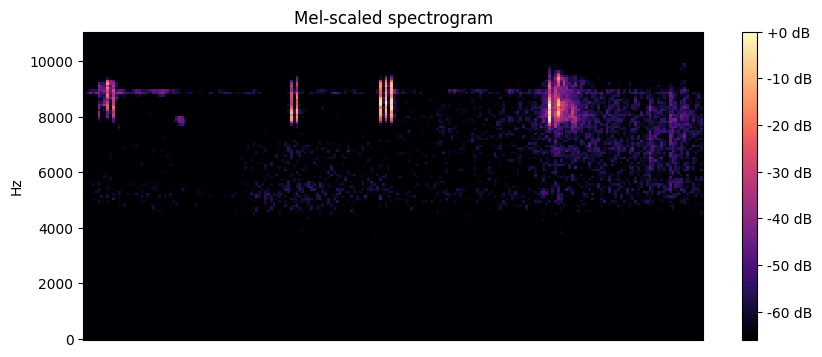

In [ ]:
# Plot mel-spectrogram
N_FFT = 1024
HOP_SIZE = 1024
N_MELS = 128
WIN_SIZE = 1024
WINDOW_TYPE = "hann"
FEATURE = "mel"
FMIN = 0

S = librosa.feature.melspectrogram(
    y=signal,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_SIZE,
    n_mels=N_MELS,
    htk=True,
    fmin=FMIN,
    fmax=sr / 2,
)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(S ** 2, ref=np.max), fmin=FMIN, y_axis="linear"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-scaled spectrogram")
plt.show()


In [ ]:
train_dir=Path("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Train")
train_filepaths=list(train_dir.glob(r'**/*.png'))

In [ ]:
test_dir=Path("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Test")
test_filepaths=list(test_dir.glob(r'**/*.png'))

In [ ]:
import pandas as pd

def image_processing(filepaths):
    # Ensure all filepaths are converted to strings
    filepaths = [str(filepath) for filepath in filepaths]

    # Extract labels from filepaths
    labels = [str(filepath).split("/")[-2] for filepath in filepaths]

    # Create a DataFrame with filepaths and labels
    df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)

    return df


In [ ]:
train_df=image_processing(train_filepaths)
test_df=image_processing(test_filepaths)
val_df=image_processing(val_filepaths)

In [ ]:
print("---Trainig Set---\n")
print(f"Number of Images: {train_df.shape[0]}\n")
print(f"Number of different labels: {len(train_df.Label.unique())}\n")
print(f"Labels: {train_df.Label.unique()}")

---Trainig Set---

Number of Images: 178

Number of different labels: 53

Labels: ['Rusty-tailed Flycatcher (Ficedula ruficauda)'
 'Malabar Parakeet (Psittacula columboides)'
 'Grey Junglefowl (Gallus sonneratii)'
 'Brown Fish Owl (Ketupa zeylonensis)'
 'Chestnut-headed Bee-eater (Merops leschenaulti)'
 'Nilgiri Flycatcher (Eumyias albicaudatus)'
 'Rufous Babbler (Turdoides subrufa)'
 'Blue-faced Malkoha (Phaenicophaeus viridirostris)'
 'Nilgiri Blue Robin (Sholicola major)'
 'Orange-headed Thrush (Geokichla citrina)'
 'Asian Fairy Bluebird (Irena puella)'
 'Asian Brown Flycatcher (Muscicapa dauurica)'
 'Nilgiri Flowerpecker (Dicaeum concolor)'
 'Malabar Barbet (Psilopogon malabaricus)'
 'White-bellied Treepie (Dendrocitta leucogastra)'
 'Greater Racket-tailed Drongo (Dicrurus paradiseus)'
 'Indian Pitta (Pitta brachyura)'
 'Yellow-browed Bulbul (Acritillas indica)'
 'Golden Oriole (Oriolus kundoo)'
 'White-rumped Shama (Copsychus malabaricus)'
 'Nilgiri Wood Pigeon (Columba elphinston

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
#Training the image to create a new image and identify(Data Augmentation)
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    zoom_range=0.15,
    width_shift_range=0.2,  # Corrected parameter name
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=False,
    fill_mode="nearest"
)

Found 178 validated image filenames belonging to 53 classes.


In [ ]:
#Validating the image to validate a new image and identify
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    zoom_range=0.15,
    width_shift_range=0.2,  # Corrected parameter name
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=False,
    fill_mode="nearest"
)


In [ ]:
#Testing the image to test a new image and identify
test_images = train_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=0,
)


Found 178 validated image filenames belonging to 53 classes.


In [ ]:
pretrained_model=tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg',
)
pretrained_model.trainable=False

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
inputs = pretrained_model.input

x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001))(pretrained_model.output)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(pretrained_model.output)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(pretrained_model.output)

outputs = tf.keras.layers.Dense(53, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=200,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/200
6/6 [==============================] - 12s 1s/step - loss: 4.6652 - accuracy: 0.0618 - val_loss: 3.7017 - val_accuracy: 0.2753
Epoch 2/200
6/6 [==============================] - 3s 597ms/step - loss: 3.5139 - accuracy: 0.2697 - val_loss: 2.9579 - val_accuracy: 0.5169
Epoch 3/200
6/6 [==============================] - 3s 597ms/step - loss: 2.7740 - accuracy: 0.5506 - val_loss: 2.2537 - val_accuracy: 0.7360
Epoch 4/200
6/6 [==============================] - 5s 890ms/step - loss: 2.1109 - accuracy: 0.7303 - val_loss: 1.6750 - val_accuracy: 0.8483
Epoch 5/200
6/6 [==============================] - 3s 590ms/step - loss: 1.5957 - accuracy: 0.8483 - val_loss: 1.2703 - val_accuracy: 0.9101
Epoch 6/200
6/6 [==============================] - 4s 785ms/step - loss: 1.1716 - accuracy: 0.9382 - val_loss: 0.9555 - val_accuracy: 0.9663
Epoch 7/200
6/6 [==============================] - 4s 818ms/step - loss: 0.9043 - accuracy: 0.9607 - val_loss: 0.7654 - val_accuracy: 0.9888
Epoch 8/200
6/6

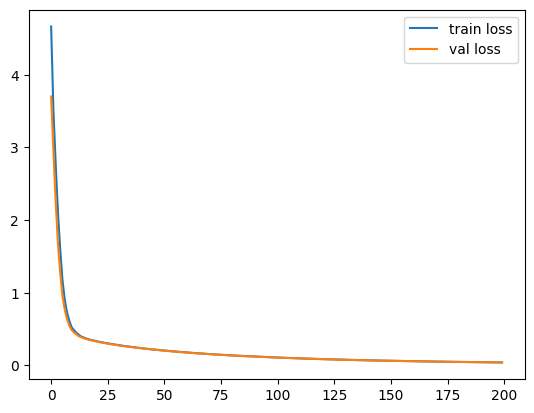

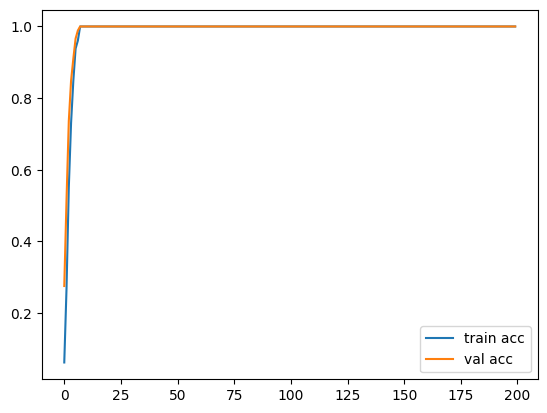

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save("Bird_species_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("Bird_species_model.h5")

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1


6/6 [==============================] - 3s 307ms/step


['White-rumped Shama (Copsychus malabaricus)',
 'Nilgiri Flowerpecker (Dicaeum concolor)',
 'Asian Brown Flycatcher (Muscicapa dauurica)',
 'Emerald Dove (Chalcophaps indica)',
 'Malabar Barbet (Psilopogon malabaricus)',
 'White-bellied Blue Robin (Sholicola albiventris)',
 'Grey-headed Bulbul (Brachypodius priocephalus)',
 'Palani Laughingthrush (Montecincla palaniensis)',
 'Palani Laughingthrush (Montecincla palaniensis)',
 'Nilgiri Blue Robin (Sholicola major)',
 'Rufous Babbler (Turdoides subrufa)',
 "Tickell's Blue Flycatcher (Cyornis tickelliae)",
 'Blue-faced Malkoha (Phaenicophaeus viridirostris)',
 'Nilgiri Blue Robin (Sholicola major)',
 'Indian Rufous Babbler (Turdoides subrufa)',
 'Malabar Barbet (Psilopogon malabaricus)',
 'Nilgiri Blue Robin (Sholicola major)',
 'Greater Racket-tailed Drongo (Dicrurus paradiseus)',
 'Rusty-tailed Flycatcher (Ficedula ruficauda)',
 'Black-and-orange Flycatcher (Ficedula nigrorufa)',
 'Spotted Dove (Spilopelia chinensis)',
 'Grey Junglefowl

In [ ]:
def output(location,model):
  img=load_img(location,target_size=(224,224,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model.predict(img)
  y_class=answer.argmax(axis=-1)
  y=" ".join(str(x) for x in y_class)
  y=int(y)
  res=labels[y]
  return res

1/1 [==============================] - 0s 23ms/step
The Predicted Bird Species is Malabar Lark (Galerida malabarica).


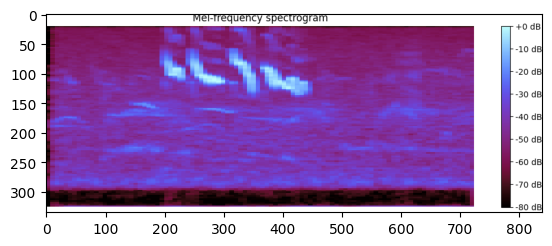

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2

test_img= cv2.imread("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Test/Malabar Lark (Galerida malabarica)/XC214131 - Malabar Lark - Galerida malabarica (mp3cut.net) (.png")
plt.imshow(test_img)

predicted_bird=output("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Test/Malabar Lark (Galerida malabarica)/XC214131 - Malabar Lark - Galerida malabarica (mp3cut.net) (.png",model)

print(f"The Predicted Bird Species is {predicted_bird}.")

In [ ]:
def predict_bird_species(audio_path, model, labels, bird_images_dir):
    spectrogram_path = 'temp_spectrogram.png'
    save_spectrogram(audio_path, spectrogram_path)
    predicted_species = output(spectrogram_path, model)

    # Display the bird image
    bird_image_path = os.path.join(bird_images_dir, f'{predicted_species}.jpg')
    if os.path.exists(bird_image_path):
        bird_img = load_img(bird_image_path)
        plt.figure(figsize=(10, 10))
        plt.imshow(bird_img)
        plt.axis('off')
        plt.title(f'{predicted_species}')
        plt.show()
    else:
        print(f'No image found for {predicted_species}')

    # Display the audio file
    ipd.display(ipd.Audio(audio_path))

    return predicted_species


audio_file_path = '/content/drive/MyDrive/Bird Species Audio/Test/Jungle Babbler (Argya striata)/whatsapp-audio-2024-06-12-at-85608-pm_yBHRL8j4.wav'
bird_images_dir = '/content/drive/MyDrive/Bird_images'
predicted_species = predict_bird_species(audio_file_path, model, labels, bird_images_dir)
print(f'The predicted bird species is: {predicted_species}')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import IPython.display as ipd
import librosa.display
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps, ImageFilter

# Load the trained model
model = load_model("/content/drive/MyDrive/Bird_species_model.h5")

# Directory containing bird images
bird_images_dir = '/content/drive/MyDrive/Bird_images'

def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.axis('off')  # No axes for a clean image
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

train_dir = Path("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Train")
train_filepaths = list(train_dir.glob(r'**/*.png'))

test_dir = Path("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Test")
test_filepaths = list(test_dir.glob(r'**/*.png'))

def image_processing(filepaths):
    # Ensure all filepaths are converted to strings
    filepaths = [str(filepath) for filepath in filepaths]

    # Extract labels from filepaths
    labels = [str(filepath).split("/")[-2] for filepath in filepaths]

    # Create a DataFrame with filepaths and labels
    df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)

    return df

train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Training the image to create a new image and identify (Data Augmentation)
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=False,
    fill_mode="nearest"
)

# Testing the image to test a new image and identify
test_images = train_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=0,
)

# Map the label
labels = (train_images.class_indices)
labels = dict((v, k) for k, v in labels.items())

def output(location, model):
    img = load_img(location, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, axis=0)
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

def add_shadow(image, offset, background_color, shadow_color, border, iterations):
    total_width = image.size[0] + abs(offset[0]) + 2 * border
    total_height = image.size[1] + abs(offset[1]) + 2 * border

    shadow = Image.new(image.mode, (total_width, total_height), background_color)

    shadow_left = border + max(offset[0], 0)
    shadow_top = border + max(offset[1], 0)

    shadow.paste(shadow_color, [shadow_left, shadow_top, shadow_left + image.size[0], shadow_top + image.size[1]])

    for i in range(iterations):
        shadow = shadow.filter(ImageFilter.BLUR)

    shadow.paste(image, (border - min(offset[0], 0), border - min(offset[1], 0)))

    return shadow

def predict_bird_species(audio_path, model, labels, bird_images_dir):
    spectrogram_path = 'temp_spectrogram.png'
    save_spectrogram(audio_path, spectrogram_path)
    predicted_species = output(spectrogram_path, model)

    # Display the audio file
    st.audio(audio_path)

    # Display the predicted species
    st.markdown(f'''
        <div style="background-color: rgba(255, 255, 255, 0.9); padding: 10px; border-radius: 10px; text-align: center;">
            <h3 style="color: black; font-size: 16px;">The predicted bird species is: {predicted_species}</h3>
        </div>
        ''', unsafe_allow_html=True)

    # Display the bird image
    bird_image_path = os.path.join(bird_images_dir, f'{predicted_species}.jpg')
    if os.path.exists(bird_image_path):
        bird_img = Image.open(bird_image_path)
        bird_img = bird_img.resize((300, 300))  # Decrease the width of the image
        bird_img = ImageOps.expand(bird_img, border=8, fill='white')  # Add a white border
        bird_img = add_shadow(bird_img, offset=(5, 5), background_color='white', shadow_color='black', border=8, iterations=5)  # Add shadow

        # Display the bird image more to the right
        st.image(bird_img, use_column_width=True)

    else:
        st.write(f'No image found for {predicted_species}')

# Streamlit UI
st.markdown("""
    <style>
    .main {
        background: url("https://media.istockphoto.com/id/506921606/photo/western-ghats-mountains.jpg?s=612x612&w=0&k=20&c=qxsthxs_KRBplRCEOFPRKo7ua5o6BKE_1nObNb9Ijhw=");
        background-size: cover;
    }
    .stApp {
        background: url("https://media.istockphoto.com/id/506921606/photo/western-ghats-mountains.jpg?s=612x612&w=0&k=20&c=qxsthxs_KRBplRCEOFPRKo7ua5o6BKE_1nObNb9Ijhw=");
        background-size: cover;
    }
    </style>
    """, unsafe_allow_html=True)

st.markdown('<div style="background-color: rgba(255, 255, 255, 0.7); padding: 10px; border-radius: 10px; text-align: center; width: 100%;"><h1 style="color: black; font-weight: bold; font-size: 24px;">Bird Species Recognition</h1></div>', unsafe_allow_html=True)

st.markdown('<div style="text-align: center;">', unsafe_allow_html=True)
uploaded_file = st.file_uploader("Upload Audio", type=["wav"])
st.markdown('</div>', unsafe_allow_html=True)

if uploaded_file is not None:
    # Save the uploaded audio file
    audio_path = f'temp_audio.wav'
    with open(audio_path, 'wb') as f:
        f.write(uploaded_file.getbuffer())

    predict_bird_species(audio_path, model, labels, bird_images_dir)


Overwriting app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.23.70.111


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.70.111:8501

npx: installed 22 in 7.212s
your url is: https://sad-geese-cry.loca.lt
2024-06-16 13:01:47.295003: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 13:01:47.295113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 13:01:47.299745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-16 13:01:47.325141: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s et

In [ ]:
import gradio as gr
import librosa.display
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps, ImageFont, ImageDraw
from pathlib import Path
import pandas as pd

# Load the trained model
model = load_model("/content/drive/MyDrive/Bird_species_model.h5")

# Directory containing bird images
bird_images_dir = '/content/drive/MyDrive/Bird_images'

def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.axis('off')  # No axes for a clean image
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

train_dir = Path("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Train")
train_filepaths = list(train_dir.glob(r'**/*.png'))

test_dir = Path("/content/drive/MyDrive/Bird Species Audio Mel_Spectrogram/Test")
test_filepaths = list(test_dir.glob(r'**/*.png'))

def image_processing(filepaths):
    # Ensure all filepaths are converted to strings
    filepaths = [str(filepath) for filepath in filepaths]

    # Extract labels from filepaths
    labels = [str(filepath).split("/")[-2] for filepath in filepaths]

    # Create a DataFrame with filepaths and labels
    df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)

    return df

train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Map the label
labels = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
).class_indices

def output(location, model):
    img = load_img(location, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    answer = model.predict(img)
    y_class = np.argmax(answer, axis=-1)
    return list(labels.keys())[list(labels.values()).index(y_class[0])]

def predict_bird_species(audio_path):
    try:
        print(f"Audio path: {audio_path}")
        spectrogram_path = 'temp_spectrogram.png'
        save_spectrogram(audio_path, spectrogram_path)
        predicted_species = output(spectrogram_path, model)

        bird_image_path = os.path.join(bird_images_dir, f'{predicted_species}.jpg')
        print(f"Predicted species: {predicted_species}")
        print(f"Bird image path: {bird_image_path}")

        if os.path.exists(bird_image_path):
            bird_img = Image.open(bird_image_path)
            bird_img = bird_img.resize((150, 150), Image.ANTIALIAS)  # Resize with anti-aliasing
            bird_img.save('output_image.png')  # Save the processed image
            return f'{predicted_species}', 'output_image.png'
        else:
            return f'No image found for {predicted_species}', None
    except Exception as e:
        print(f"Error: {e}")
        return str(e), None

# Custom CSS for title, description, and font style
custom_css = """
body {
    background-color: #f76c6c;  /* Reddish orange background color */
    font-family: 'Helvetica', sans-serif;  /* Example: change font family */
    color: #fff;  /* White font color */
    font-size: 16px;  /* Example: change font size */
}

.gr-hosted .gr-box {
    background-color: #ffa500;  /* Orange background color */
    border-color: #ffa500;  /* Orange border color */
}

.gr-hosted .gr-box h2 {
    color: #f76c6c;  /* Reddish orange font color */
}
"""

app = gr.Interface(
    fn=predict_bird_species,
    inputs=gr.Audio(type="filepath", label="Bird Species Audio"),  # Change label for audio input
    outputs=[
        gr.Textbox(label="Predicted Bird Species"),  # Change label for prediction output
        gr.Image(type="filepath", label="Bird Image")
    ],
    title="Bird Species Recognition",
    description="Upload a bird audio file and get the species prediction along with the bird image.",
    css=custom_css  # Add custom CSS for title, description, and style
)

app.launch()


Found 178 validated image filenames belonging to 53 classes.
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f537716269fb059634.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
